## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [2]:
name='Ilya Romanov' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)
df= pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
df

,sales,month,day,year
0,134.710,10,31,2020
1,137.740,7,31,2020
2,134.620,4,30,2020
3,141.670,1,31,2020
4,127.990,10,31,2019
...,...,...,...,...
142,1.656,4,30,1985
143,2.074,1,31,1985
144,1.584,10,31,1984
145,1.508,7,31,1984


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [4]:
# code here (0.5 pt.)
# We can use .sum instead of .value_counts() because it is more convenient
df.isna().sum()

sales    0
month    0
day      0
year     0
dtype: int64

How many missing values are there in ``` df ```?

In [5]:
# answer (0.5 pt.)
# There are zero missing values

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [7]:
# answer (0.5 pt.)
# There are three separate columns: one for month, one for day and one for year

Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [9]:
# code here (0.5 pt.)
df['date'] = pd.to_datetime(df[['month','day','year']], format = '%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [10]:
# code here (0.25 pt.)
df.index = df['date']

What is the size of the dataset?

use ```.shape```

In [11]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [12]:
# code here (0.25 pt.)
df=df.drop(['month','year','day','date'], axis=1)

What is the size of the dataset now?

In [13]:
# code here (0.25 pt.)
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [22]:
# code here (0.25 pt.)
y = df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [23]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

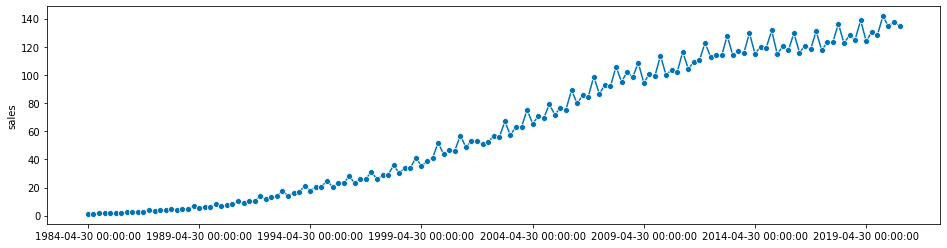

In [24]:
# code here (0.25 pt.)
plot_series(y);

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [25]:
# code here (0.5 pt.)
train, test = temporal_train_test_split(y,test_size = 0.2)

plot train and test samples using ``` plot_series ```

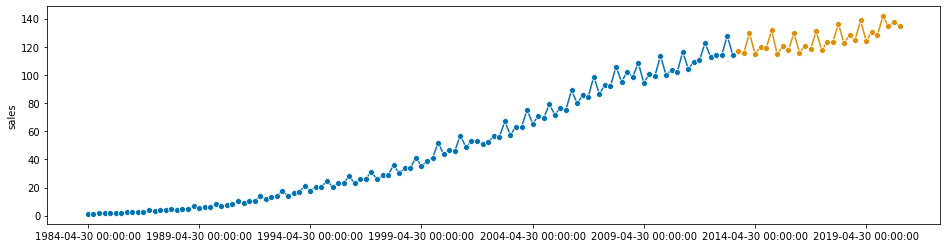

In [26]:
# code here (0.25 pt.)
plot_series(train, test);

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [28]:
# code here (0.5 pt.)
model_MAA = ETSModel(train, error='mul', trend='add', seasonal='add', seasonal_periods= 4)
fit_MAA = model_MAA.fit()

/Users/ilyaromanov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [29]:
# code here (0.5 pt.)
model_AAM = ETSModel(train, error='add', trend='add', seasonal='mul', seasonal_periods= 4)
fit_AAM = model_AAM.fit()

/Users/ilyaromanov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [30]:
# code here (0.25 pt.)
for_MAA = fit_MAA.forecast(steps= 30)

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [31]:
# code here (0.25 pt.)
for_AAM = fit_AAM.forecast(steps= 30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

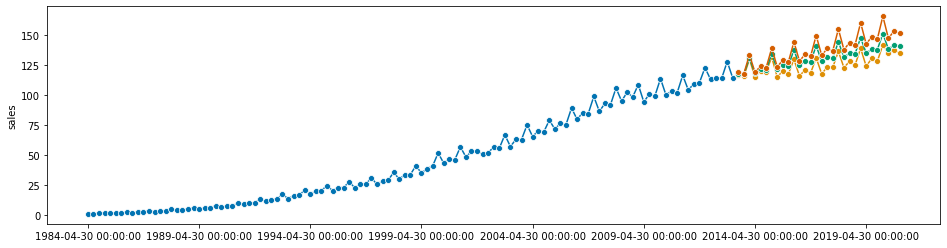

In [33]:
# code here (0.5 pt.)
plot_series(train, test,for_MAA,for_AAM);

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [34]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int = pred_MAA['pi_upper']
lower_int = pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

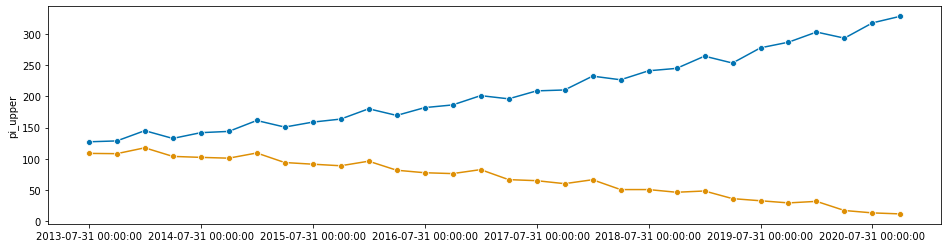

In [35]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int);

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [36]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int = pred_AAM['pi_upper']
lower_int = pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

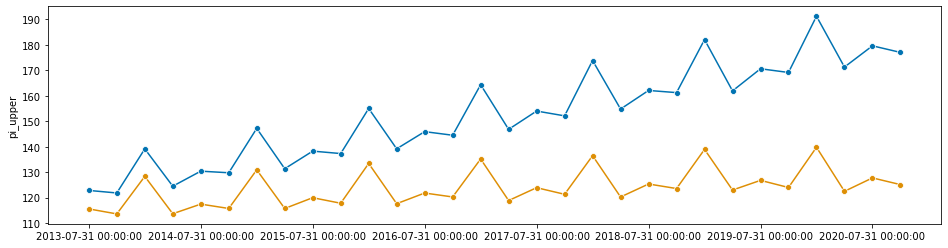

In [37]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int);

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [38]:
# code here (0.5 pt.) MAA
mean_absolute_error(test,for_MAA)

6.394542702158996

In [39]:
# code here (0.5 pt.) AAM
mean_absolute_error(test,for_AAM)

12.708898765471032

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [40]:
# code here (0.5 pt.) MAA
mean_squared_error(test, for_MAA)

50.57141271152441

In [41]:
# code here (0.5 pt.) AAM
mean_squared_error(test, for_AAM)

195.96214763396836

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [42]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [43]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(test, for_MAA)

5.091697969378487

In [44]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(test, for_AAM)

9.993317967703987

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [45]:
# code here (1 pt.)
# The first model(MAA) is more accurate than the second one(AAM) according to the metrics calculated above.
